In [3]:
import pandas as pd
from matplotlib.pyplot as plt

df = pd.read_csv(r'C:\ML projects\ML-Projects\carprices.csv')
df.head(3)

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100


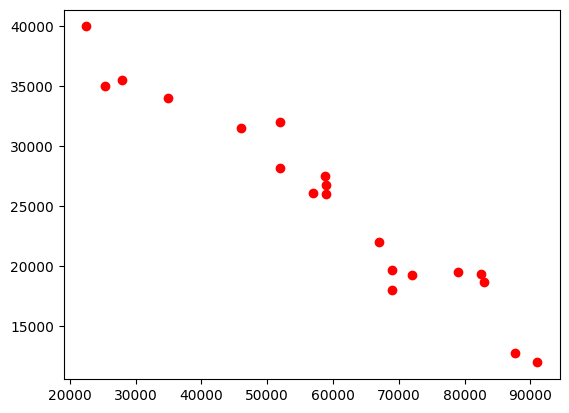

In [22]:
plt.scatter(df.Mileage,df['Sell Price($)'],color='red')

In [45]:
x = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=len(x))
len(x_train)

16

In [40]:
len(x_test)

4

In [46]:
from sklearn.linear_model import LinearRegression
li_reg = LinearRegression()
li_reg.fit(x_train,y_train)
li_reg.predict(x_test)

array([36821.97158073, 25049.76647149, 16127.86692079, 30136.38586493])

In [47]:
li_reg.score(x_test,y_test)

0.895231370796628